In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.datasets import make_blobs # for dataset
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans # Algo
from kneed import KneeLocator # to find K value
from sklearn.metrics import silhouette_score # for performance score

In [2]:
X,_= make_blobs(n_samples=1000,centers=3, # because of this I will have 3 clustered groups(means I will have 3 grouped data(in simple laguage I will have 3 classes))
                 n_features=2,random_state=42)

Clustered Data??????


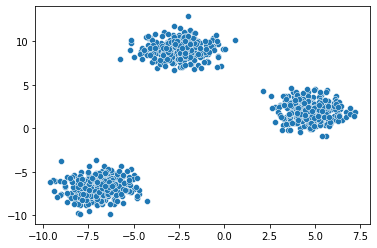

In [3]:
sns.scatterplot(data=X,x=X[:,0],y=X[:,1])
print('Clustered Data??????')

In [4]:
X_train, X_test = train_test_split(X, test_size=0.33, random_state=42)
print('I have not splitted y values because I dont have to use ')
print(X_train.shape , X_test.shape)

I have not splitted y values because I dont have to use 
(670, 2) (330, 2)


## Finding K value using Elbow Method(this is manual Process)

In [5]:
wcss = []
for k in range(1,11):
    Kmeans = KMeans(n_clusters=k,init='k-means++')
    Kmeans.fit(X_train)
    (wcss.append(Kmeans.inertia_ # k value we find in this method 
                ))

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

In [6]:
wcss

[44450.72387542038,
 12741.823357662122,
 1329.7219815435358,
 1162.5663444692846,
 1006.1317568911561,
 852.5898768294489,
 756.6805108078443,
 674.3572685131022,
 595.795732404357,
 549.4608761410037]

## Ploting elbow curve

Here 3 is the value where wcss gets stable so I will use 3 as my k value


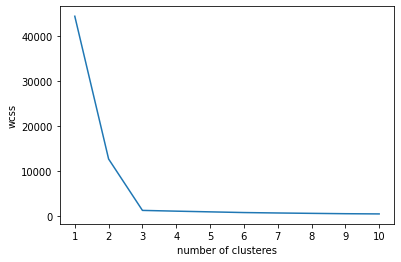

In [7]:
plt.plot(range(1,11),wcss)
plt.xticks(range(1,11))
plt.xlabel('number of clusteres')
plt.ylabel('wcss')
print('Here 3 is the value where wcss gets stable so I will use 3 as my k value')

In [8]:
kmeans = KMeans(n_clusters=3,init='k-means++')
kmeans

KMeans(n_clusters=3)

In [12]:
y_labels = kmeans.fit_predict(X_train)
# here I have done fit_predict because I have to find out lables of X_train data

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


In [13]:
y_labels

array([2, 1, 2, 0, 1, 2, 2, 0, 2, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 2, 0,
       1, 0, 0, 2, 1, 0, 0, 1, 0, 1, 1, 1, 0, 2, 0, 2, 2, 1, 1, 1, 0, 2,
       2, 0, 2, 2, 0, 1, 1, 0, 1, 2, 1, 0, 1, 2, 0, 2, 1, 2, 2, 2, 2, 0,
       1, 1, 1, 2, 2, 1, 1, 2, 0, 0, 2, 1, 0, 2, 1, 1, 1, 1, 1, 1, 2, 0,
       0, 0, 0, 1, 2, 0, 0, 1, 0, 0, 1, 2, 0, 2, 0, 2, 1, 0, 0, 1, 1, 2,
       0, 1, 0, 1, 0, 1, 0, 2, 2, 0, 0, 2, 0, 2, 2, 0, 2, 0, 2, 1, 2, 2,
       0, 2, 2, 1, 0, 0, 0, 1, 1, 2, 1, 0, 1, 2, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 2, 2, 2, 2, 1, 2, 2, 2, 0, 1, 1, 1, 2, 1, 1, 2, 2, 2,
       2, 2, 0, 0, 2, 2, 0, 2, 1, 1, 2, 1, 2, 1, 2, 0, 1, 1, 0, 0, 1, 0,
       2, 2, 0, 2, 0, 2, 0, 1, 1, 1, 0, 2, 0, 0, 1, 1, 1, 2, 2, 0, 1, 2,
       1, 1, 2, 0, 1, 2, 2, 0, 0, 0, 1, 1, 2, 2, 2, 2, 1, 0, 2, 1, 0, 1,
       1, 1, 2, 0, 1, 1, 0, 1, 2, 0, 0, 1, 0, 0, 2, 2, 1, 1, 0, 1, 0, 1,
       2, 0, 2, 2, 0, 2, 0, 1, 1, 2, 0, 1, 2, 2, 1, 2, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 2, 1, 0, 0, 1, 1, 1, 1, 2, 0,

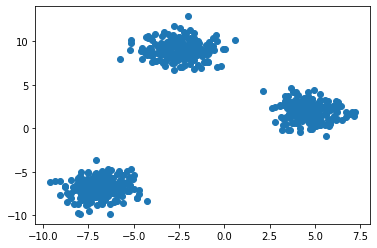

In [14]:
plt.scatter(X_train[:,0],X_train[:,1])

In [15]:
y_test_label = kmeans.predict(X_test)

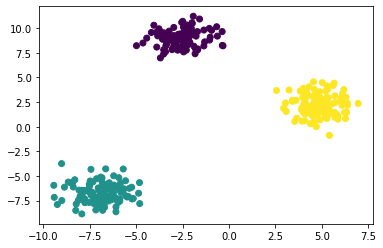

In [16]:
plt.scatter(X_test[:,0],X_test[:,1],c=y_test_label)

## finding k value using kneelocator

### to use kneelocator I do first have to install kneed

### if wcss increases so we should use concav but if decreases we should use convex

In [17]:
kl = KneeLocator(x=range(1,11),y=wcss,curve='convex',direction='decreasing')
kl.elbow

3

### Calculating Silhouette score(to check performance of the model)

In [18]:
silhouette_coefficients=[]
for k in range(2,11):
    kmeans=KMeans(n_clusters=k,init="k-means++")
    kmeans.fit(X_train)
    score=silhouette_score(X_train,kmeans.labels_)
    silhouette_coefficients.append(score)

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

In [19]:
print(silhouette_coefficients)
print(f'maximum silhoutte socre {max(silhouette_coefficients)}')
print('models performace is 84%')

[0.7024009416893275, 0.8417121581954964, 0.6680583438195635, 0.4881833080703553, 0.33545519879374647, 0.3361555488702425, 0.33716716617318093, 0.3240535777158446, 0.3293979160910205]
maximum silhoutte socre 0.8417121581954964
models performace is 84%


## Visualizing highest silhouette score

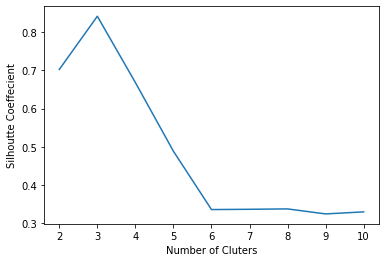

In [20]:
## plotting silhouette score
plt.plot(range(2,11),silhouette_coefficients)
plt.xticks(range(2,11))
plt.xlabel("Number of Cluters")
plt.ylabel("Silhoutte Coeffecient")
plt.show()